<a href="https://colab.research.google.com/github/giladbarnea/scratches/blob/master/efficient-frontier/home-task/algo-home-task/efficient_frontier_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
%load_ext google.colab.data_table
from google.colab import files
import altair as alt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
uploaded = files.upload()

In [35]:
def get_chunks(data, chunksize=10000, chunk_count=None):
    chunks = []
    chunk = dict()
    count = 0
    for i, (key, value) in enumerate(data.items()):
        if i and i % chunksize == 0:
            chunks.append(chunk)
            count += 1
            chunk = dict()
            if chunk_count and chunk_count == count:
                return chunks
        chunk[key] = value
    return chunks


In [3]:
def simulate_stream(data):
    """Yields a DataFrame"""
    keys = list(data.keys())
    for i, (key, value) in enumerate(data.items()):
        try:
            yield pd.DataFrame({key: value})
            nextkey = int(keys[i + 1])
            diff_sec = (nextkey - int(key)) / 1000
            sleep(diff_sec)
        except IndexError:
            # end of file
            return

In [40]:
data:dict = json.loads(uploaded['data.json'])

In [58]:
from vega_datasets import data as vega_data
stocks = vega_data.stocks()
stocks

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
...,...,...,...
555,AAPL,2009-11-01,199.91
556,AAPL,2009-12-01,210.73
557,AAPL,2010-01-01,192.06
558,AAPL,2010-02-01,204.62


In [41]:
chunk = get_chunks(data, chunksize=1000, chunk_count=1)[0]

In [117]:
chunkiter = iter(chunk)
key0 = int(next(chunkiter))
keys = []
assetA_asks = []
assetB_asks = []
assetA_bids = []
assetB_bids = []
for i, (k, v) in enumerate(chunk.items()):
    assetA_ask = v['assetA']['ask']
    assetB_ask = v['assetB']['ask']
    assetA_bid = v['assetA']['bid']
    assetB_bid = v['assetB']['bid']
    norm_key = int(k) - key0
    keys.append(norm_key)
    assetA_asks.append(assetA_ask)
    assetB_asks.append(assetB_ask)
    assetA_bids.append(assetA_bid)
    assetB_bids.append(assetB_bid)

Text(0, 0.5, 'Price')

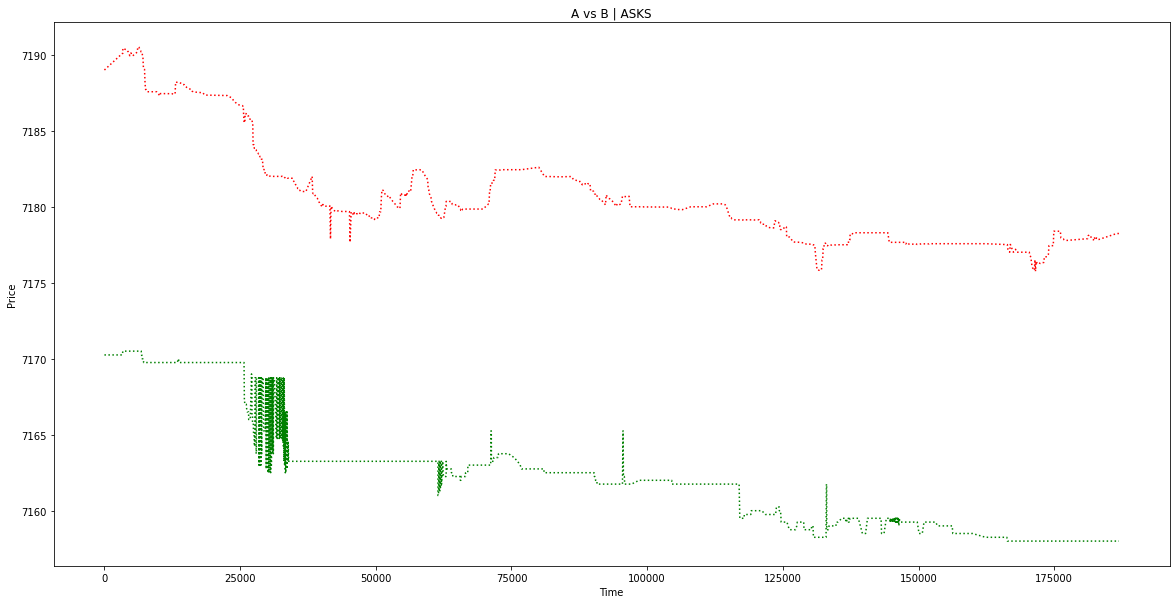

In [124]:
# A vs B | ASKS
plt.figure(figsize=(20,10))
plt.plot(keys, assetA_asks,':r', 
         keys, assetB_asks, ':g')
plt.title('A vs B | ASKS')
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

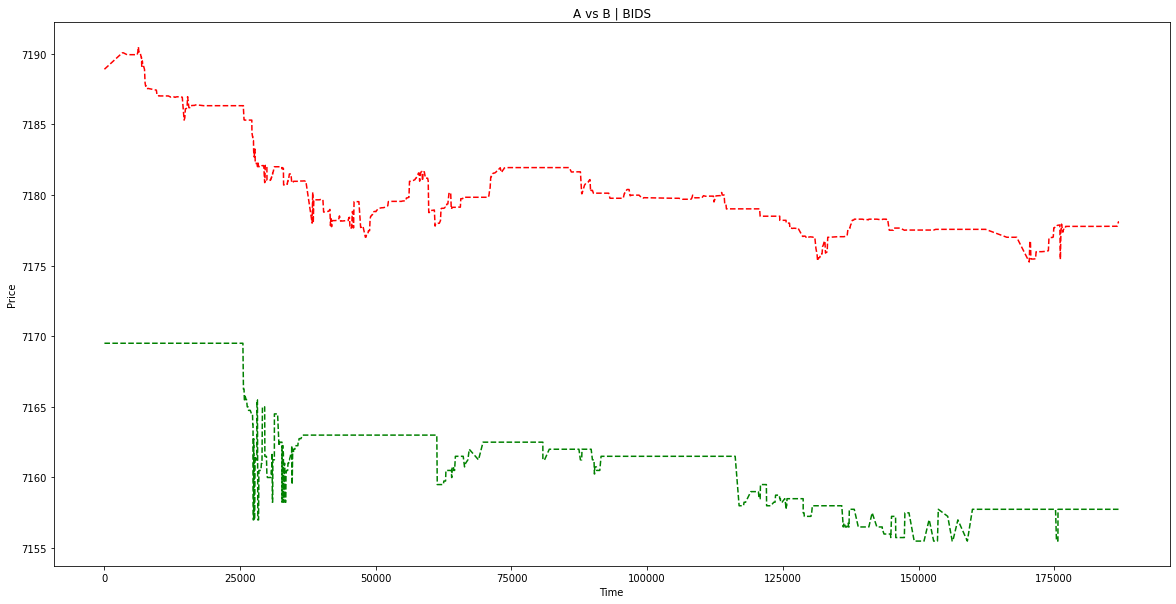

In [125]:
# A vs B | BIDS
plt.figure(figsize=(20,10))
plt.plot(keys, assetA_bids,'--r', 
         keys, assetB_bids, '--g')
plt.title('A vs B | BIDS')
plt.xlabel('Time')
plt.ylabel('Price')

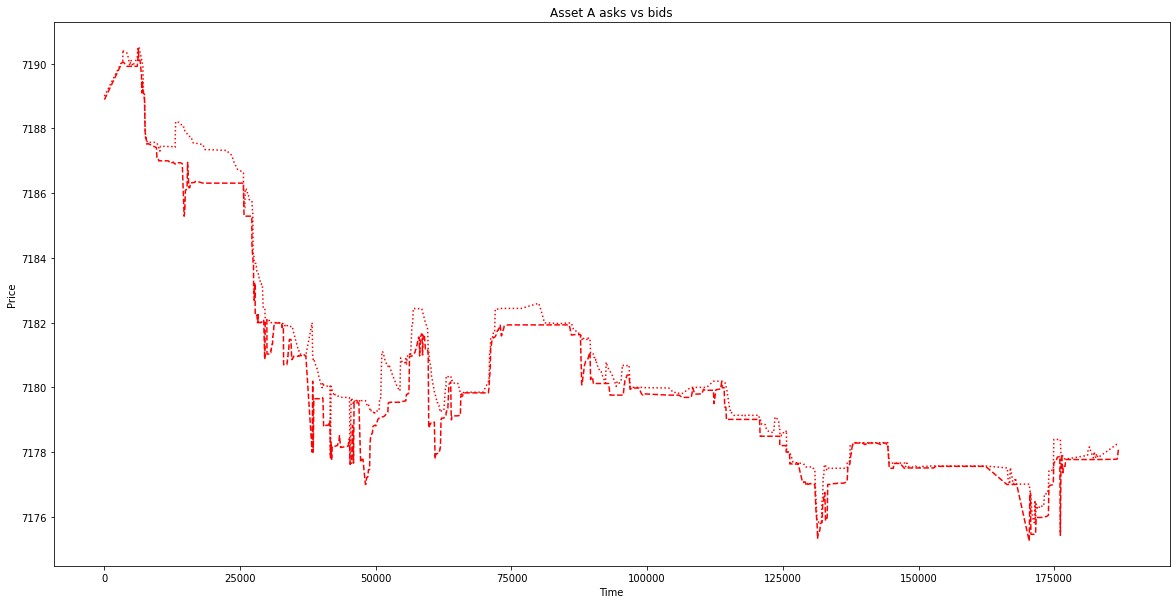

In [119]:
# A | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(keys, assetA_asks, ':r', 
         keys, assetA_bids, '--r')
plt.title('A | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

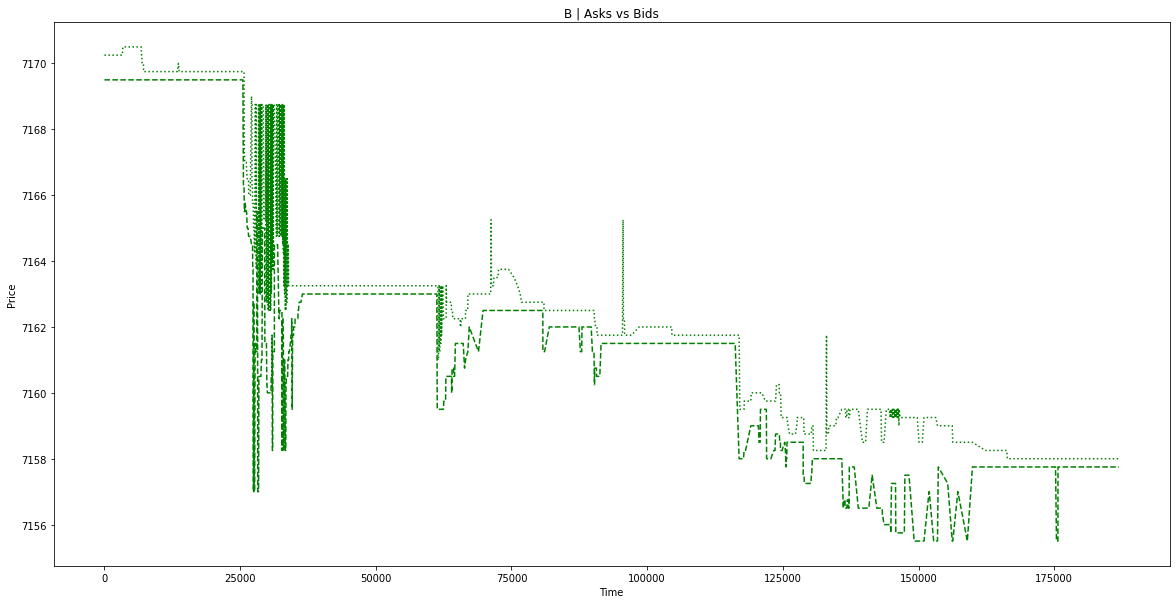

In [128]:
# B | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(keys, assetB_asks, ':g', 
         keys, assetB_bids, '--g')
plt.title('B | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [57]:
data = {ts0:first,ts1:second}
df = pd.DataFrame.from_dict(data,orient='index')
df

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
